# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pandas as dataframe
import numpy as np
import requests
import time
import json

from collections import Counter

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [133]:
citipy

<module 'citipy.citipy' from 'C:\\Users\\pk949\\Anaconda3\\envs\\PythonData\\lib\\site-packages\\citipy\\citipy.py'>

## Generate Cities List

In [134]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [135]:
#define url and temperature units
url = "https://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
#city = "London"
query_url = f"{url}&appid={api_key}&units={units}&q="
#query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'https://api.openweathermap.org/data/2.5/weather?&appid=b85d5c3f3c3fd69f60e21cc60594036d&units=imperial&q='


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [136]:
#Output city call logs
maindict = {}
call_log = []



# For loop on city list
for city in cities:
    maindict[city] = {}
    ct_cities = 0
for city in cities:
    weather_response = requests.get(query_url + city).json()
             
    
#Output
    if 'clouds' in weather_response.keys():
        ct_cities += len(city) 
#       call_log.append(f"Processing Record {ct_cities}: {city}.")
        call_log.append(f"Processing Record {ct_cities} of set 1 | {query_url + city}")
    # no data for this city because the key isn't in the json {'cities'.value_counts(normalize=True)}{city.value_counts}
    else: 
        call_log.append(f"City not found. Skipping...")
        #print(call_log)
        daff = pd.DataFrame(call_log)
        daff.to_csv("printlog.csv", index=False, header=True)

In [137]:
# For loop on api response in json. call weather values.

maindict = {}
call_log = []

# For loop on city list
for city in cities:
    maindict[city] = {}
for city in cities:
    weather_response = requests.get(query_url + city).json()
    
#Output
    
#Cloudiness
    if 'clouds' in weather_response.keys():
        if 'all' in weather_response['clouds']:
            maindict[city]['Cloudiness'] = weather_response['clouds']['all']
    # no data for this city because the key isn't in the json
        else: 
            maindict[city]['Cloudiness'] = None
#Country
    if 'sys' in weather_response.keys():
        if 'country' in weather_response['sys']:
            maindict[city]['Country'] = weather_response['sys']['country']
     # no data for this city because the key isn't in the json
        else: 
            maindict[city]['Country'] = None  
#Date
    if 'dt' in weather_response.keys():
        maindict[city]['Date'] = weather_response['dt']
     # no data for this city because the key isn't in the json
    else: 
        maindict[city]['Date'] = None  
#Humidity
    if 'main' in weather_response.keys():
        if 'humidity' in weather_response['main']:
            maindict[city]['Humidity'] = weather_response['main']['humidity']
     # no data for this city because the key isn't in the json
        else: 
            maindict[city]['Humidity'] = None 
#Lat
    if 'coord' in weather_response.keys():
        if 'lat' in weather_response['coord']:
            maindict[city]['Lat'] = weather_response['coord']['lat']
     # no data for this city because the key isn't in the json
        else: 
            maindict[city]['Lat'] = None  
#Lng
    if 'coord' in weather_response.keys():
        if 'lon' in weather_response['coord']:
            maindict[city]['Lng'] = weather_response['coord']['lon']
     # no data for this city because the key isn't in the json
        else: 
            maindict[city]['Lng'] = None
#Max Temp
    if 'main' in weather_response.keys():
        if 'temp_max' in weather_response['main']:
            maindict[city]['Max Temp'] = weather_response['main']['temp_max']
     # no data for this city because the key isn't in the json
        else: 
            maindict[city]['Max Temp'] = None   
#Wind Speed
    if 'wind' in weather_response.keys():
        if 'speed' in weather_response['wind']:
            maindict[city]['Wind Speed'] = weather_response['wind']['speed']
     # no data for this city because the key isn't in the json
        else: 
            maindict[city]['Wind Speed'] = None 

         
# transpose columns and rows in df        
# displace count of values
maindict = pd.DataFrame(maindict)
maindict_t = maindict.T
maindict_ct = maindict_t.dropna(how="any")
maindict_ct.count()


Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [138]:
#Display of Main DF
maindict_t.index.name = "City"
maindict_t.reset_index()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,phangnga,20,TH,1559509034,88,8.45,98.53,80.6,2.24
1,lebu,66,ET,1559508998,84,8.96,38.73,55.64,0.38
2,butaritari,60,KI,1559508972,78,3.07,172.79,83.54,13.18
3,busselton,33,AU,1559508631,48,-33.64,115.35,67.16,17
4,viedma,0,AR,1559508972,56,-40.81,-62.99,57.8,10.87
5,barrow,32,AR,1559508877,49,-38.31,-60.23,57.08,9.13
6,araguaina,64,BR,1559509035,70,-7.19,-48.21,80.12,2.01
7,asau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,new norfolk,75,AU,1559508862,75,-42.78,147.06,46.4,14.99
9,ahipara,3,NZ,1559509036,60,-35.17,173.16,59.6,18.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

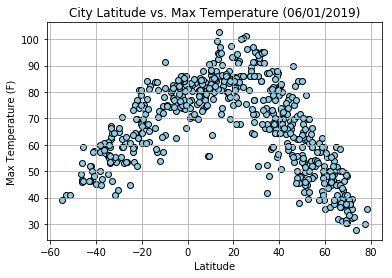

In [139]:

plt.grid(True)
x = maindict_t['Lat']
y = maindict_t['Max Temp']

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature (06/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(x, y, marker = "o", facecolors = "SkyBlue", edgecolors = "black")

#### Latitude vs. Humidity Plot

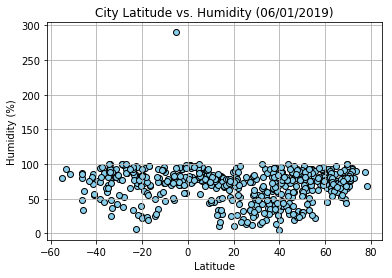

In [140]:
plt.grid(True)
x = maindict_t['Lat']
y = maindict_t['Humidity']

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (06/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x, y, marker = "o", facecolors = "SkyBlue", edgecolors = "black")

#### Latitude vs. Cloudiness Plot

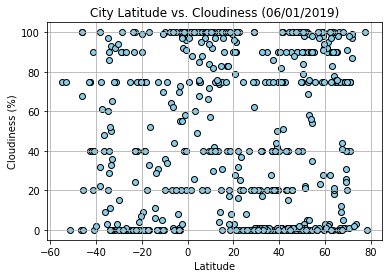

In [141]:
plt.grid(True)
x = maindict_t['Lat']
y = maindict_t['Cloudiness']

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (06/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x, y, marker = "o", facecolors = "SkyBlue", edgecolors = "black")

#### Latitude vs. Wind Speed Plot

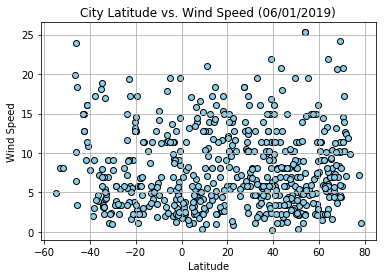

In [142]:
plt.grid(True)
x = maindict_t['Lat']
y = maindict_t['Wind Speed']

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (06/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x, y, marker = "o", facecolors = "SkyBlue", edgecolors = "black")